In [1]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import *
import pickle
import csv
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\mvsan\Downloads\bike_sharing.csv")

In [3]:
data = data.loc[:,['temp','cnt']]
data.dtypes

temp    float64
cnt       int64
dtype: object

In [4]:
# Divide data into features and label
y_data_set = np.array(pd.DataFrame(data.temp))
x_data_set = np.array(data["cnt"])

In [5]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x_data_set.reshape(-1, 1) )
y = sc_y.fit_transform(y_data_set.reshape(-1, 1) )

In [6]:
print("shape of x data",x.shape)
print("shape of y data",y.shape)

shape of x data (17379, 1)
shape of y data (17379, 1)


In [9]:
def splitdata(data):
    # split train and test data
    train, test = train_test_split(data,test_size = 0.35, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)
    #     print("y_train : ", y_train.shape, " y_test : ", y_test.shape)

splitdata(data)

train :  (11296, 2)  test :  (6083, 2)


In [10]:
print("x_train shape",x.shape)
print("y_train shape",y.shape)

x_train shape (17379, 1)
y_train shape (17379, 1)



 Regressor :  SVR()


 Prediction 

 

 prediction of y train data :  [-0.57082912 -0.61478852 -0.60356528 ... -0.52774916 -0.61573166
 -0.62093886]


 ACCURACY 



 Accuracy train data acc_r2 :  81.94857963782383

 Accuracy train data median_ab_error :  69.43292101485514

 visualising using SVR 
 


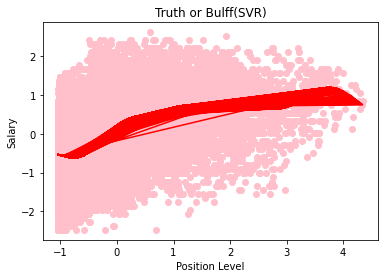


 visualising Regression Model 
 


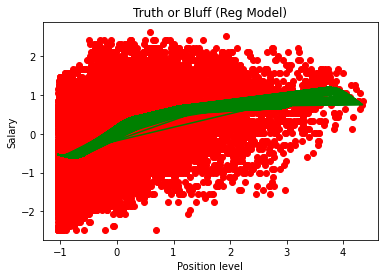

In [11]:
class Support_Vector_Regression:
    
    # fitting Support_Vector_Regression to the training set
    
    def model_train(self,x,y):  
        regressor = SVR(kernel= 'rbf')
        regressor.fit(x,y)
        return regressor
    
    # dump train model pickle file
    
    def pickel_file(self,regressor):
        
       
        file = open('trainmodel.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()
    
    # predicting the test set result and train set result
    
    def prediction(self,x,regressor):
        print("\n\n Prediction \n\n ")
        # prediction for only 6.5
#         y_pred_train = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
        
        # prediction for all data x
        y_pred_train = regressor.predict(x)
        return y_pred_train

    # Accuracy for train and test
    
    
    def accuracy(self,y,y_pred_train):
        

        print("\n\n ACCURACY \n\n")

        # acc using r2
        error = r2_score(y, y_pred_train)      
        acc_r2 = (1-error)*100
       
        # using median_ab_error
        median_ab_error = median_absolute_error(y, y_pred_train)*100
        return acc_r2, median_ab_error
        

    
    
    # visualising the training set results

    def plotting(self,x, y,regressor):
        print("\n visualising using SVR \n ")
        plt.scatter(x, y , color = 'pink')
        plt.plot(x, regressor.predict(x), color = 'red')
        plt.title("Truth or Bulff(SVR)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        
        print("\n visualising Regression Model \n ")
        plt.scatter(x, y, color ='red')
        plt.plot(x, regressor.predict(x), color ='green')
        plt.title('Truth or Bluff (Reg Model)')
        plt.xlabel('Position level')
        plt.ylabel('Salary')
        plt.show()
 
        
def main(data,x,y):
    
    object_SVM = Support_Vector_Regression()
    
    regressor = object_SVM.model_train(x,y)
    print("\n Regressor : ", regressor)
    
    object_SVM.pickel_file(regressor)
    
  
    
    y_pred_train = object_SVM.prediction(x,regressor)
    print("\n prediction of y train data : ",y_pred_train)
    
    acc_r2,median_ab_error = object_SVM.accuracy(y,y_pred_train)
    print("\n Accuracy train data acc_r2 : ", acc_r2)
    print("\n Accuracy train data median_ab_error : ",  median_ab_error)
    object_SVM.plotting(x,y,regressor)
main(data,x,y)